## Preamble

In [64]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import statsmodels.formula.api as sm

%matplotlib inline

In [3]:
most = pd.read_csv('/home/ozzy/Documents/CEU/MPDS/Homework/Data/Clean/most_combined.csv')
healthy = pd.read_csv('/home/ozzy/Documents/CEU/MPDS/Homework/Data/Clean/healthy_combined.csv')
after = pd.read_csv('/home/ozzy/Documents/CEU/MPDS/Homework/Data/Clean/after_combined.csv')

## Correlation

We have used the cleaner notebook to clean and combine our raw data. From here onwards, we will work on the transformed data. 

We are asked to look at the correlation between alcohol consumption and life expectancy. Below, correlation coefficient of life expectancy and alcohol consumotion can be seen for life expectancy from birth, from 60 years of age and healthy life expectancy from birth. Pairwise correlation coefficients between other variables can also be seen following the main exercise.

In [13]:
pearsonr(most["Numeric"], most["total_litres_of_pure_alcohol"])

(0.5229732013227903, 8.424056615105076e-15)

In [30]:
most.corr()[["Numeric"]]

,Numeric
Population,0.012381
Area,0.028482
Pop. Density,0.157145
Coastline,0.052400
Net migration,0.123086
Infant mortality,-0.862845
GDP,0.679862
Literacy,0.686430
Phones,0.735930
Arable,0.129808


In [15]:
pearsonr(healthy["Numeric"], healthy["total_litres_of_pure_alcohol"])

(0.5194041542657446, 1.3740913252717588e-14)

In [29]:
healthy.corr()[["Numeric"]]

,Numeric
Population,0.035631
Area,0.046602
Pop. Density,0.170943
Coastline,0.047091
Net migration,0.132898
Infant mortality,-0.862273
GDP,0.688270
Literacy,0.694757
Phones,0.739754
Arable,0.141139


In [16]:
pearsonr(after["Numeric"], after["total_litres_of_pure_alcohol"])

(0.5417296624445751, 5.845497401977279e-16)

In [28]:
after.corr()[["Numeric"]]

,Numeric
Population,-0.030332
Area,0.020648
Pop. Density,0.198431
Coastline,-0.012262
Net migration,0.207798
Infant mortality,-0.731450
GDP,0.752737
Literacy,0.616857
Phones,0.762344
Arable,0.079612


It is evident that alcohol consumption and all forms of life expectencies shows a rather strong positive correlation. This is counterintuitive. But looking at the pairwise correlations, we can also see that life expectancy is strongly correlated with GDP as well or other developmental variables such as literacy, birth rate, population density and of course infant mortality and death rate of a given country. It is most likely that more developed countries tend to consume more alcohol, given their higher disposable income (or perhaps given their more accurate data collection though we don't know the methodology behind these numbers but it could be that developing countries might have a bigger unrecorded economy). 

The correlation seems to be highly biased due to this phenomenon. We can take a look at correlations between alcohol consumption and GDP (among other variables) to see if this is indeed correct. A simple OLS regression can also help us determine if alcohol consumption's inclusion offers us enough insight for explaining life expectancies or rather it creates noise for each variables coefficient. But first, we should also take a look at some scatterplots of alcohol consumption to see if the effet is somewhat linear or if there are any distinct patterns (such as increasing morbidity with higher alcohol consumption and so on). For ease of analysis, I am opting for checking only the life expectancy from birth dataset from now on since the datasets are quite similar anyways. 

## Visualizations

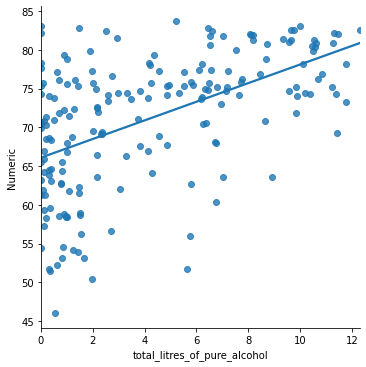

In [40]:
graph1 = sns.lmplot(x = "total_litres_of_pure_alcohol", y = 'Numeric', data = most, fit_reg=True, order=1, ci=None)
graph1

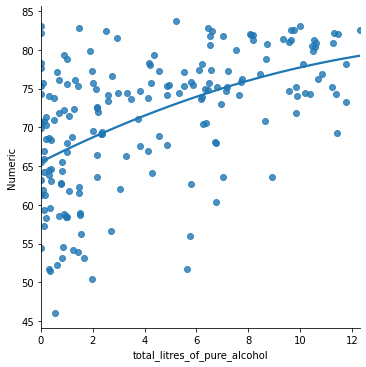

In [41]:
graph2 = sns.lmplot(x = "total_litres_of_pure_alcohol", y = 'Numeric', data = most, fit_reg=True, order=2, ci=None)
graph2

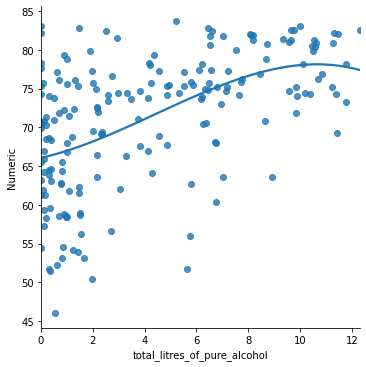

In [44]:
graph3 = sns.lmplot(x = "total_litres_of_pure_alcohol", y = 'Numeric', data = most, fit_reg=True, order=3, ci=None)
graph3

There seems to be a nonlinear association betweem life expectancy and alcohol consumption but the effect is weak. It is hard to argue that there are two distinct story when it comes to alcohol consumption. It seems to be plainly associated positively with life expectancy. Now, we can see pairwise correlation of alcohol consumption with other variables.

In [60]:
most.corr()[["total_litres_of_pure_alcohol"]]

,total_litres_of_pure_alcohol
Population,-0.011443
Area,0.150210
Pop. Density,-0.101727
Coastline,-0.056365
Net migration,-0.018710
Infant mortality,-0.556204
GDP,0.544550
Literacy,0.603354
Phones,0.602322
Arable,0.283953


Not surprisingly, we can see that GDP, literacy, phones, infant mortality and so on is highly correlated with alcohol consumption. There seems to be a multicollinearity issue here. We can check two alternative OLS regressions and try to assess individual variables' statistical significance, i.e. their variance and also overall model significance to see if alcohol consumption offers any insights in understanding life expectancy.

It is possible to use an algorithm to assist us in our feature selection but I highly doubt it is necessary here. Noisy variables and possible relevant variables seems to be easily noticeable by common sense alone. It is also possible to take a cross-validation approach or even create data partitions to see if our model fits good enough or not but it is also not very relevant for our problem at hand. We just want to see the effects of including the alcohol consumption to our model to ascertain that correlation doesn't always mean causation.

## OLS - Causation

In [81]:
most.rename( columns = {"Pop. Density" : "Pop_Density", "Net migration" : "Net_migration", "Infant mortality" : "Infant_mortality"}, inplace = True)

In [86]:
result_no_alcohol = sm.ols(formula="Numeric ~ Pop_Density + Net_migration + Infant_mortality + GDP", data=most).fit()

In [88]:
print(result_no_alcohol.summary())

                            OLS Regression Results                            
Dep. Variable:                Numeric   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     173.9
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.57e-61
Time:                        18:44:28   Log-Likelihood:                -529.23
No. Observations:                 190   AIC:                             1068.
Df Residuals:                     185   BIC:                             1085.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           76.1053      0.791  

The above simple OLS shows that infant mortality and GDP are highly significant in showing the patterns in life expectancy. Individually population density and net migration measures are insignificant but standard errors of GDP and infant mortality seems rather low, for GDP, it is almost nonexistent. R-squared and adjusted R-squared are quite high and F-statistic, which shows our model's overall significance is very high. We can easily say the model, even though it is very simple, shows promise. We can make it better by transforming some of the variables and even creating new ones from the existing data but what we have as it is should suffice for our purposes.

In [89]:
result_alcohol = sm.ols(formula="Numeric ~ Pop_Density + Net_migration + Infant_mortality + GDP + total_litres_of_pure_alcohol", data=most).fit()

In [91]:
print(result_alcohol.summary())

                            OLS Regression Results                            
Dep. Variable:                Numeric   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     138.4
Date:                Mon, 24 May 2021   Prob (F-statistic):           2.19e-60
Time:                        18:50:02   Log-Likelihood:                -529.22
No. Observations:                 190   AIC:                             1070.
Df Residuals:                     184   BIC:                             1090.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Including alcohol consumption to our model has several impact on our results. First of all, the alcohol consumption variable is statistically insignificant, its coefficient is most likely 0. Its inclusion has dramatically reduced our F-statistic (its p value has increased by 13 times, which is an adverse effect when it comes to p values). The model seems to have suffered by the inclusion of alcohol consumption. The individual t-statistics of all of our variables have worsened. 

We can safely suggest that alcohol consumption is highly correlated with other statistically significant variables that explains the differences in life expectencies of various countries. It is evident that correlation doesn't bring about causation. 